In [10]:
import pandas as pd
import matplotlib.pyplot as plt
global file_path
file_path = "/forms-results/finals/Questionario per terapisti.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('\r', '', regex=False)

# Define a full translation dictionary
translation_dict = {
    "Totalmente d'accordo": "Strongly agree",
    "D'accordo": "Agree",
    "Neutro": "Neutral",
    "In disaccordo": "Disagree",
    "Totalmente in disaccordo": "Strongly disagree",
    "Sì": "Yes",
    "No": "No",  # This is valid in English too, but we include it to ensure mapping
    "Ad alta voce": "Read aloud",
    "A mente": "Silently",
    "Con la sintesi": "With audio synthesis",
    "Ad alta voce;A mente": "Read aloud;Silently",
    "Ad alta voce;Con la sintesi": "Read aloud;With audio synthesis",
    "1- Testo completo": "1- Full text",
    "2- Solo Frasi": "2- Sentences only",
    "3- Frasi e Pittogrammi": "3- Sentences and pictograms",
    "4- Frasi, Pittogrammi e Parole Chiave": "4- Sentences, pictograms and keywords"
}
df = df.applymap(lambda x: translation_dict.get(x, x))


/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_3371/652083024.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: translation_dict.get(x, x))


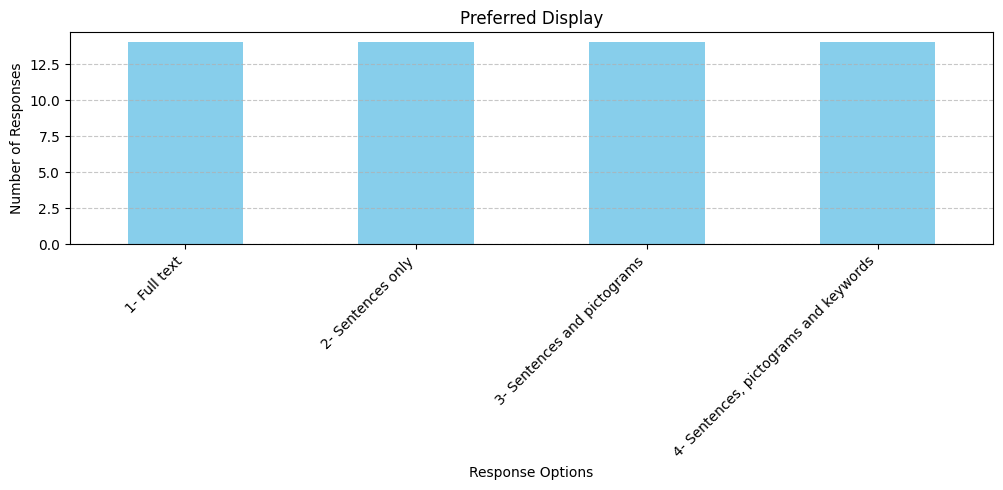

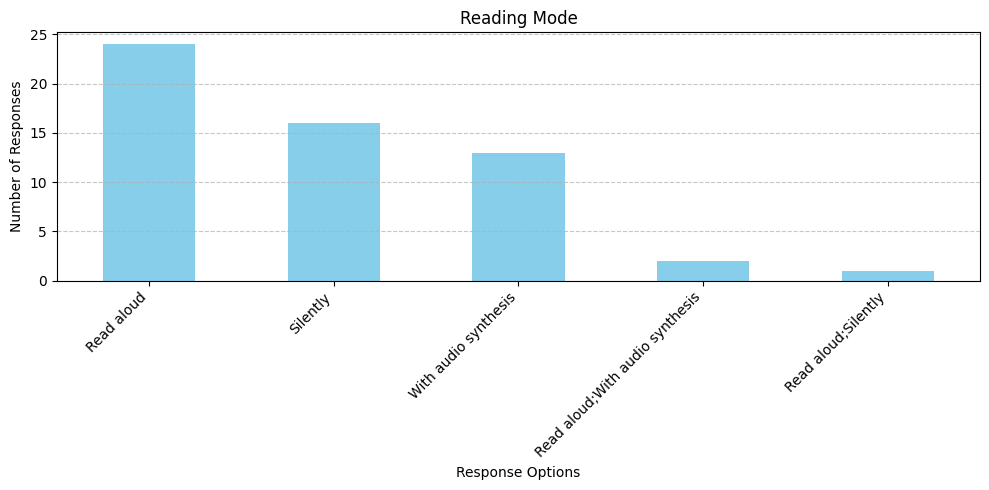

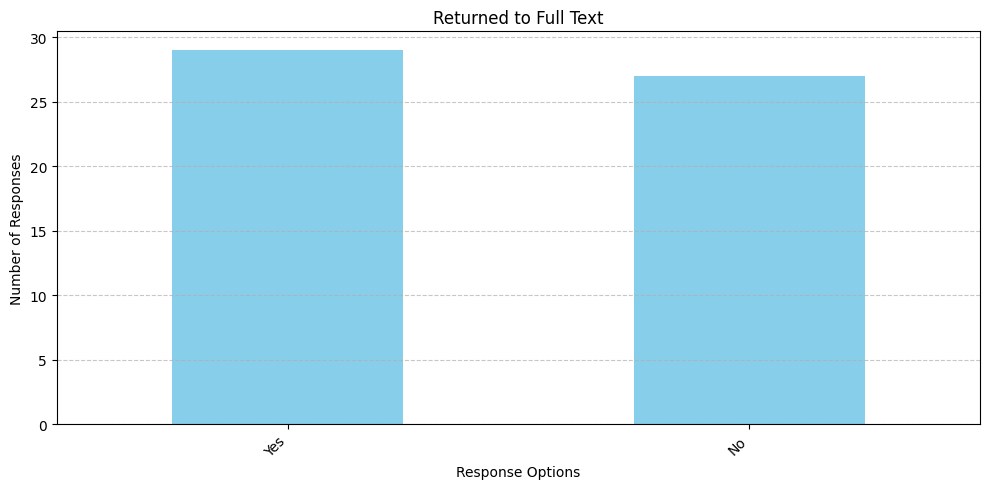

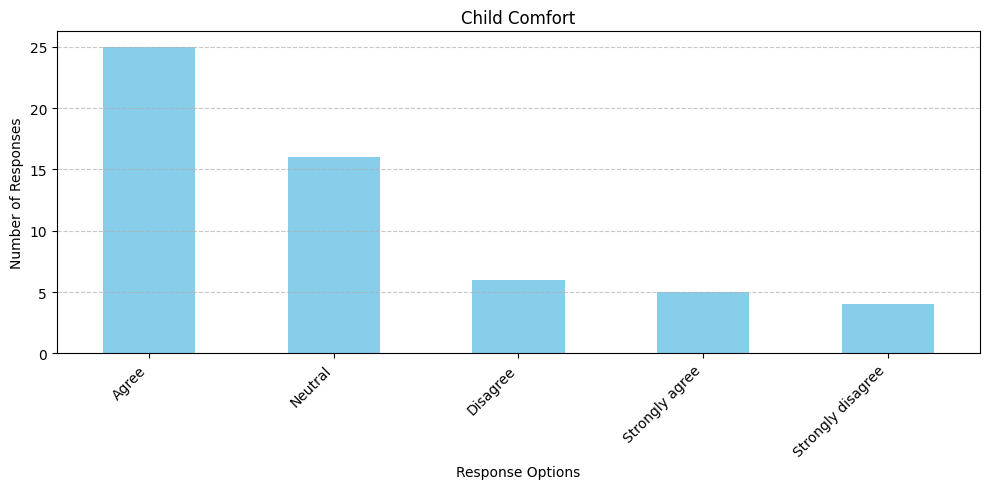

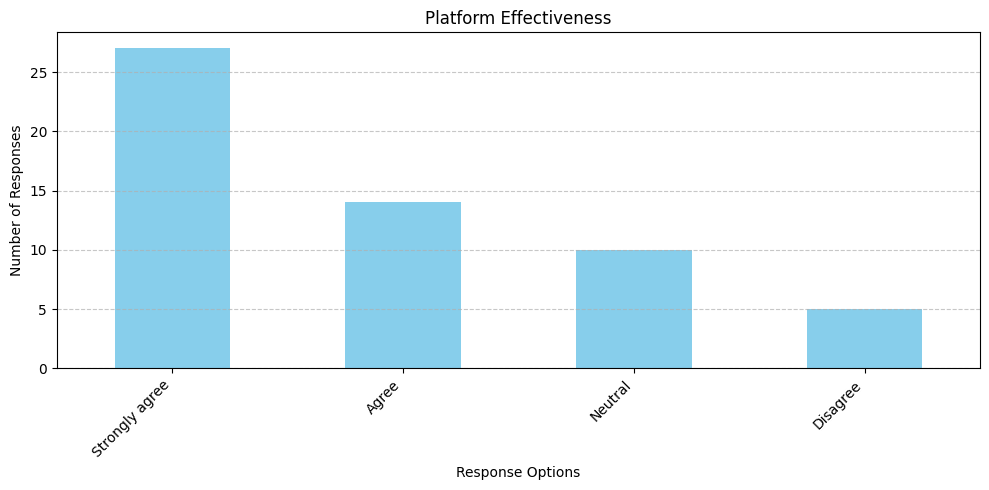

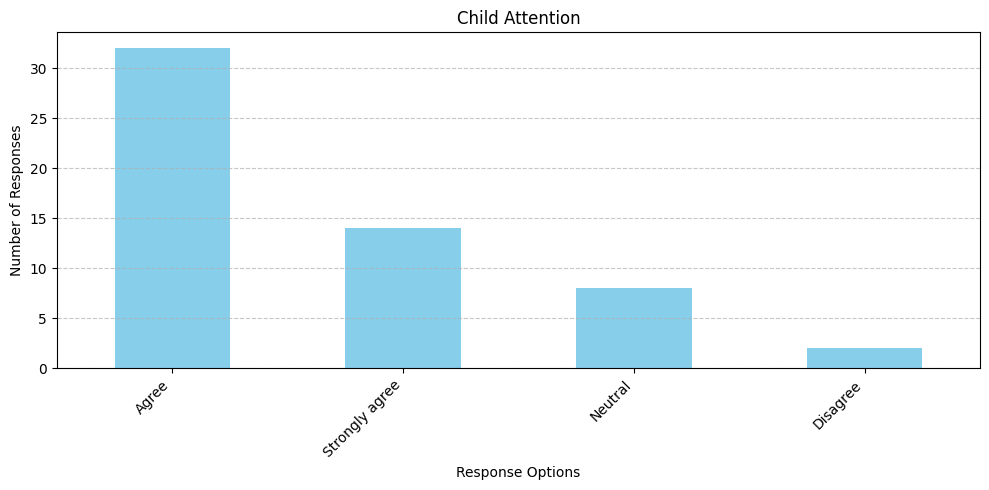

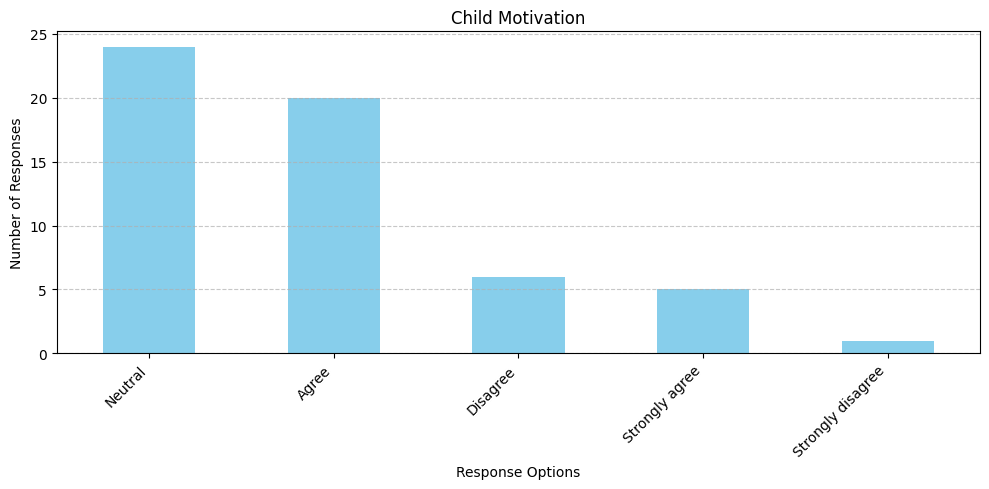

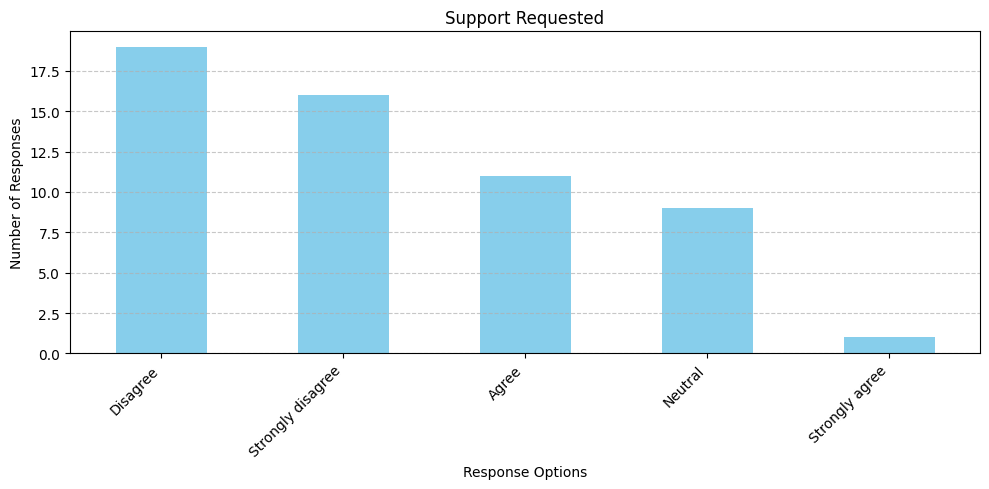

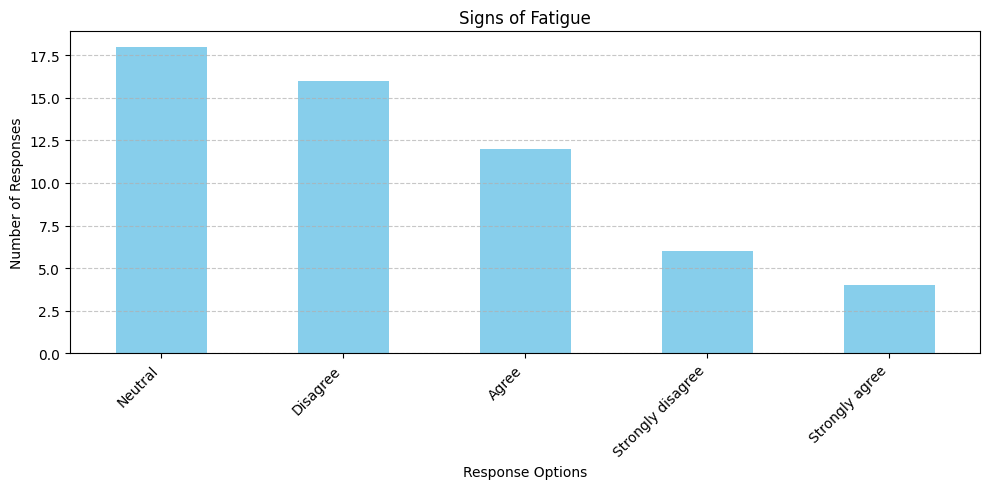

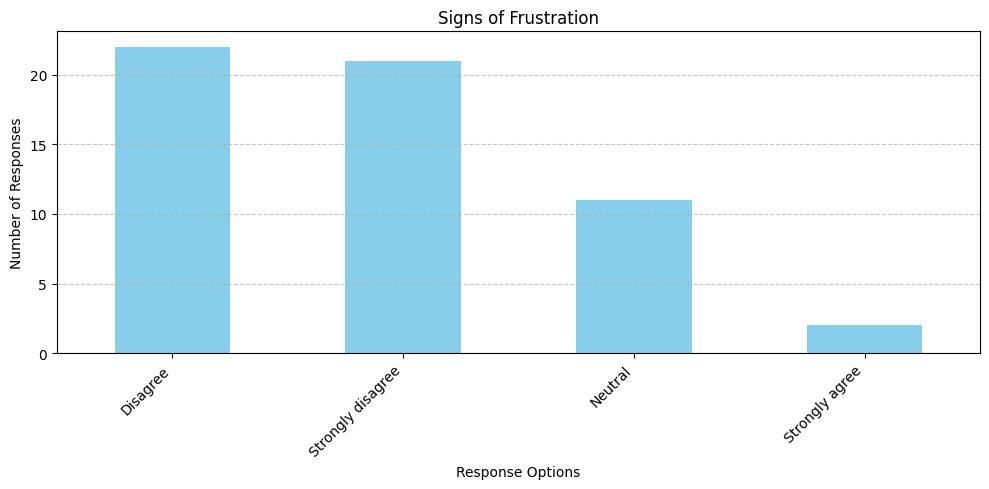

In [11]:

# Summarize key responses
summary = {
    "Preferred Display": df["Modalità di visualizzazione"].value_counts(),
    "Reading Mode": df["Modalità di lettura del bambino"].value_counts(),
    "Returned to Full Text": df["Il bambino è tornato al testo completo durante la risposta alle domande?"].value_counts(),
    "Child Comfort": df["Il bambino sembra a suo agio durante la lettura."].value_counts(),
    "Platform Effectiveness": df["La piattaforma ha funzionato in maniera efficace"].value_counts(),
    "Child Attention": df["Il bambino è attento durante la lettura"].value_counts(),
    "Child Motivation": df["Il bambino si è mostrato motivato nel svolgere la lettura"].value_counts(),
    "Support Requested": df["Il bambino ha richiesto un supporto da parte dell'operatore"].value_counts(),
    "Signs of Fatigue": df["Il bambino ha mostrato segni di affaticamento nel svolgere l'attività"].value_counts(),
    "Signs of Frustration": df["Il bambino ha mostrato segni di frustrazione nella lettura"].value_counts()
}

# Plotting
questions_to_plot = list(summary.keys())
for question in questions_to_plot:
    fig, ax = plt.subplots(figsize=(10, 5))
    summary[question].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(question)
    ax.set_ylabel("Number of Responses")
    ax.set_xlabel("Response Options")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


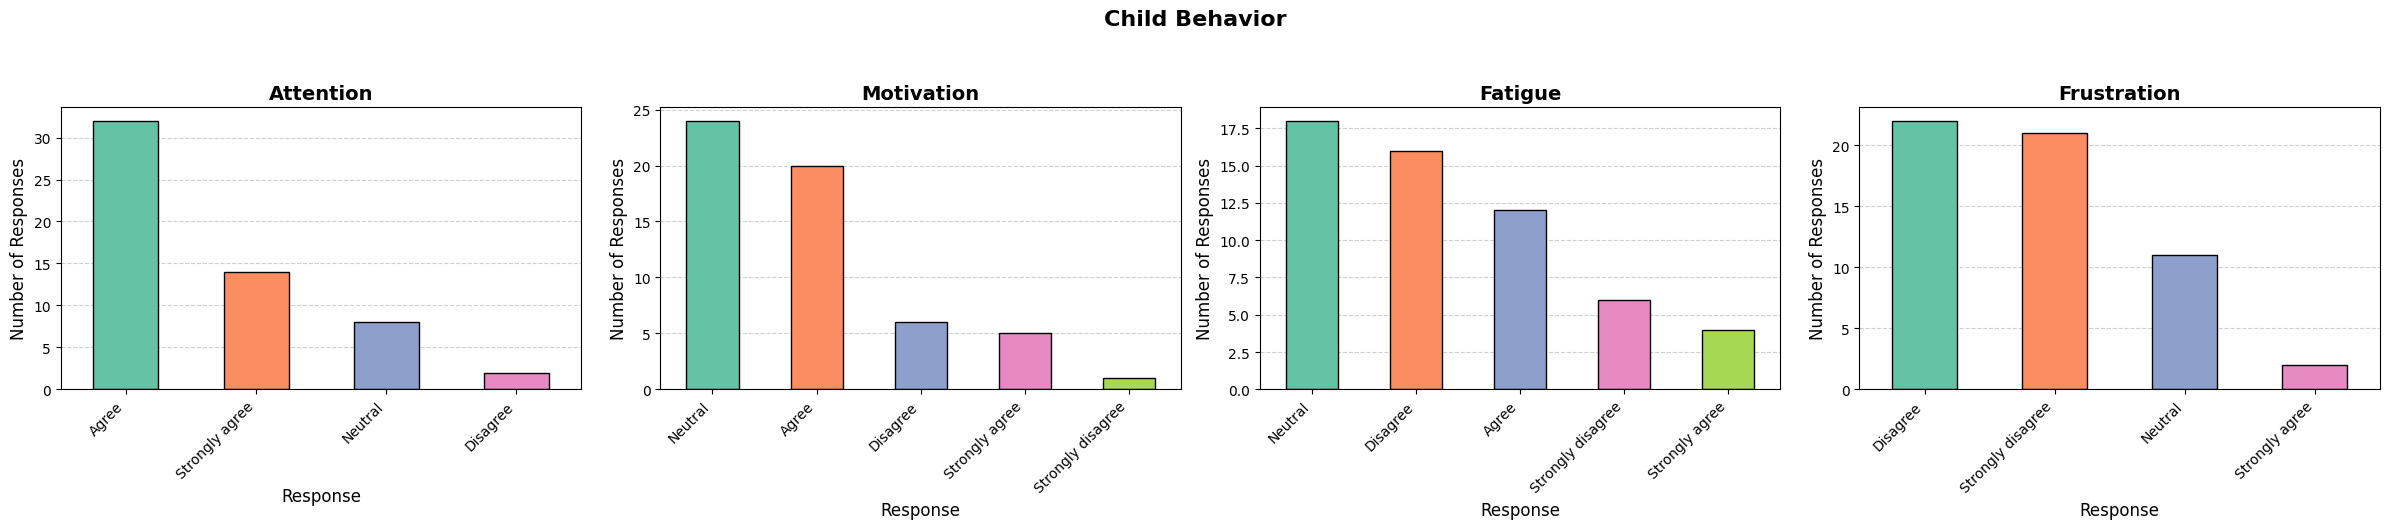

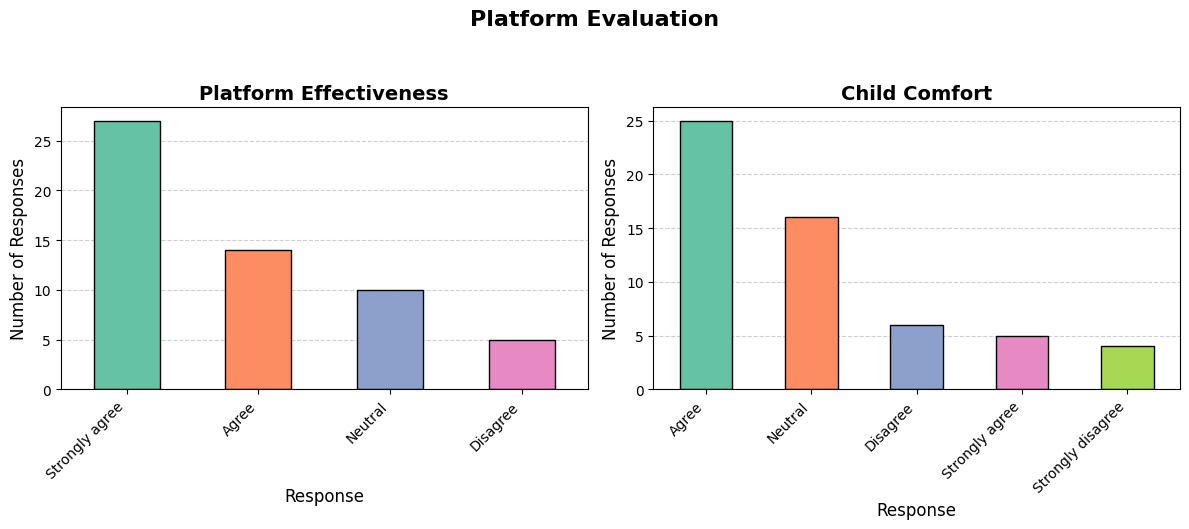

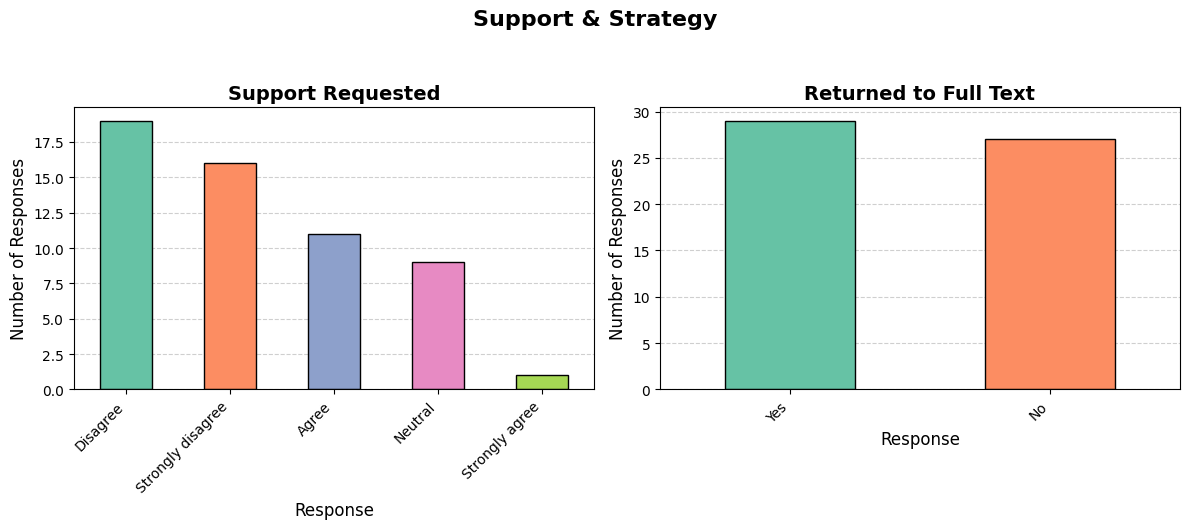

In [12]:
# Rebuild summary using English columns
summary = {
    "Preferred Display": df["Modalità di visualizzazione"].value_counts(),
    "Reading Mode": df["Modalità di lettura del bambino"].value_counts(),
    "Returned to Full Text": df["Il bambino è tornato al testo completo durante la risposta alle domande?"].value_counts(),
    "Child Comfort": df["Il bambino sembra a suo agio durante la lettura."].value_counts(),
    "Platform Effectiveness": df["La piattaforma ha funzionato in maniera efficace"].value_counts(),
    "Child Attention": df["Il bambino è attento durante la lettura"].value_counts(),
    "Child Motivation": df["Il bambino si è mostrato motivato nel svolgere la lettura"].value_counts(),
    "Support Requested": df["Il bambino ha richiesto un supporto da parte dell'operatore"].value_counts(),
    "Signs of Fatigue": df["Il bambino ha mostrato segni di affaticamento nel svolgere l'attività"].value_counts(),
    "Signs of Frustration": df["Il bambino ha mostrato segni di frustrazione nella lettura"].value_counts()
}

# Group summaries for comparative visualizations
grouped_data = {
    "Child Behavior": {
        "Attention": summary["Child Attention"],
        "Motivation": summary["Child Motivation"],
        "Fatigue": summary["Signs of Fatigue"],
        "Frustration": summary["Signs of Frustration"]
    },
    "Platform Evaluation": {
        "Platform Effectiveness": summary["Platform Effectiveness"],
        "Child Comfort": summary["Child Comfort"]
    },
    "Support & Strategy": {
        "Support Requested": summary["Support Requested"],
        "Returned to Full Text": summary["Returned to Full Text"]
    }
}

# Plotting with improved aesthetics
for category, charts in grouped_data.items():
    num_charts = len(charts)
    fig, axes = plt.subplots(nrows=1, ncols=num_charts, figsize=(6 * num_charts, 5))
    if num_charts == 1:
        axes = [axes]  # Ensure iterable
    
    for ax, (title, data_series) in zip(axes, charts.items()):
        colors = plt.cm.Set2(range(len(data_series)))  # Use a soft color palette
        data_series.plot(
            kind='bar',
            ax=ax,
            color=colors,
            edgecolor='black'
        )
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel("Number of Responses", fontsize=12)
        ax.set_xlabel("Response", fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.set_axisbelow(True)

    fig.suptitle(category, fontsize=16, fontweight='bold', y=1.05)
    fig.tight_layout()
    plt.show()


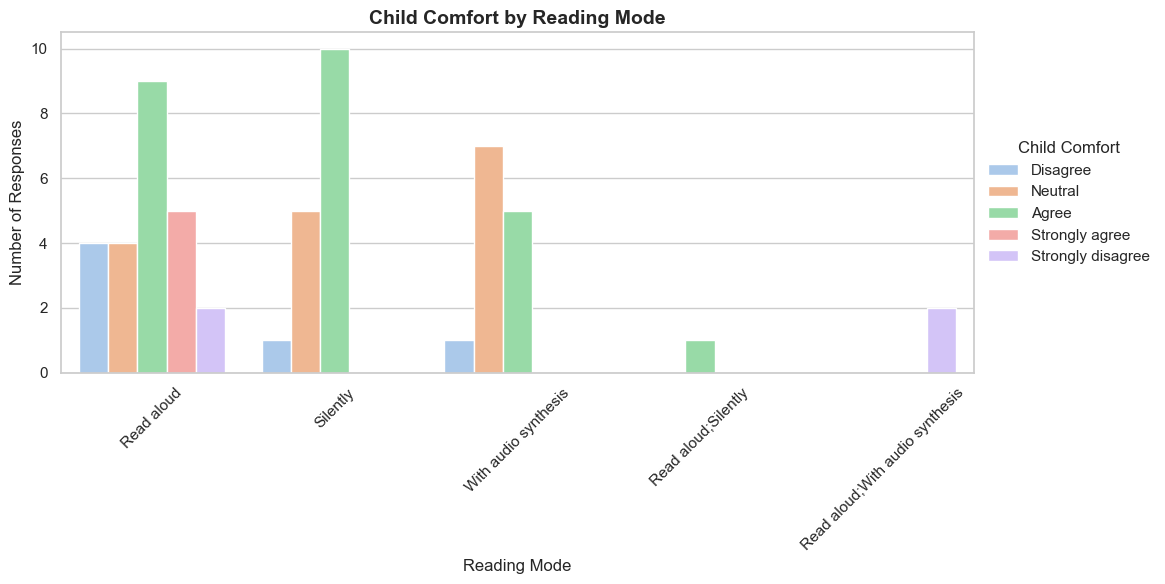

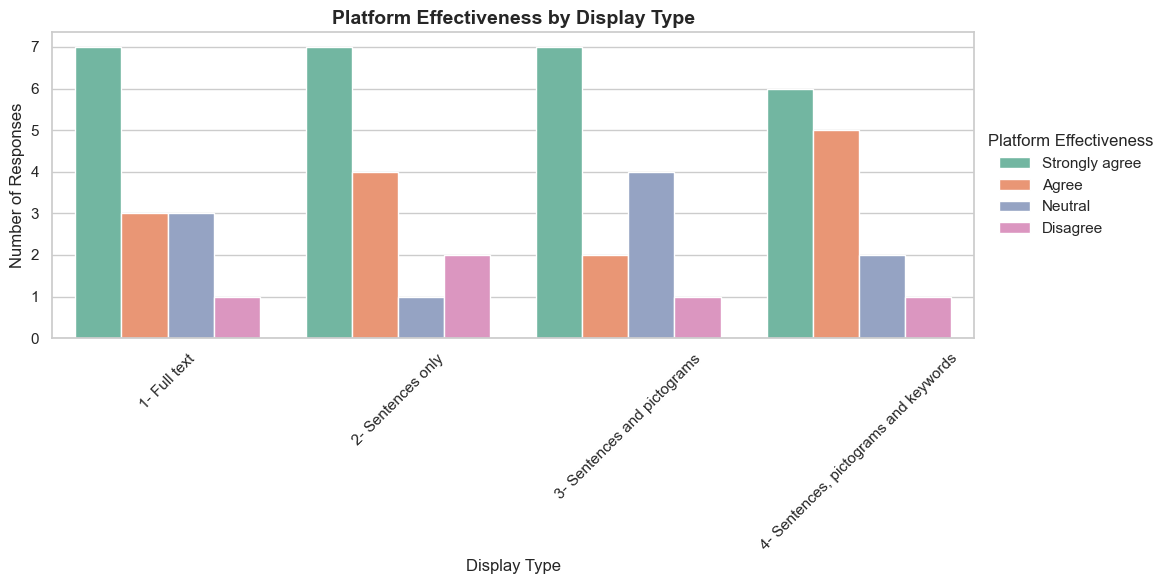

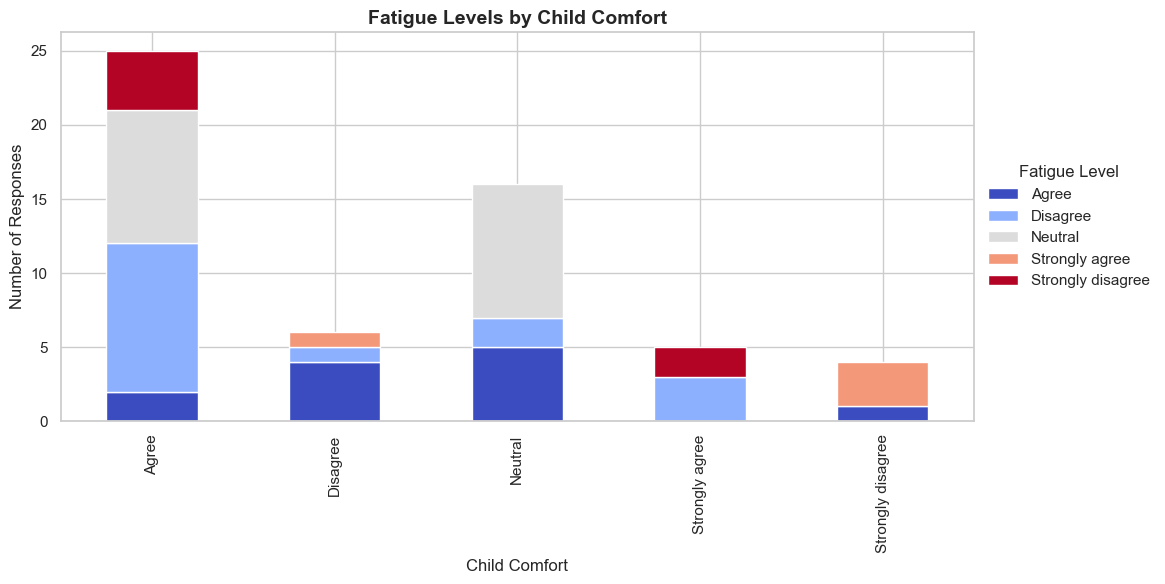

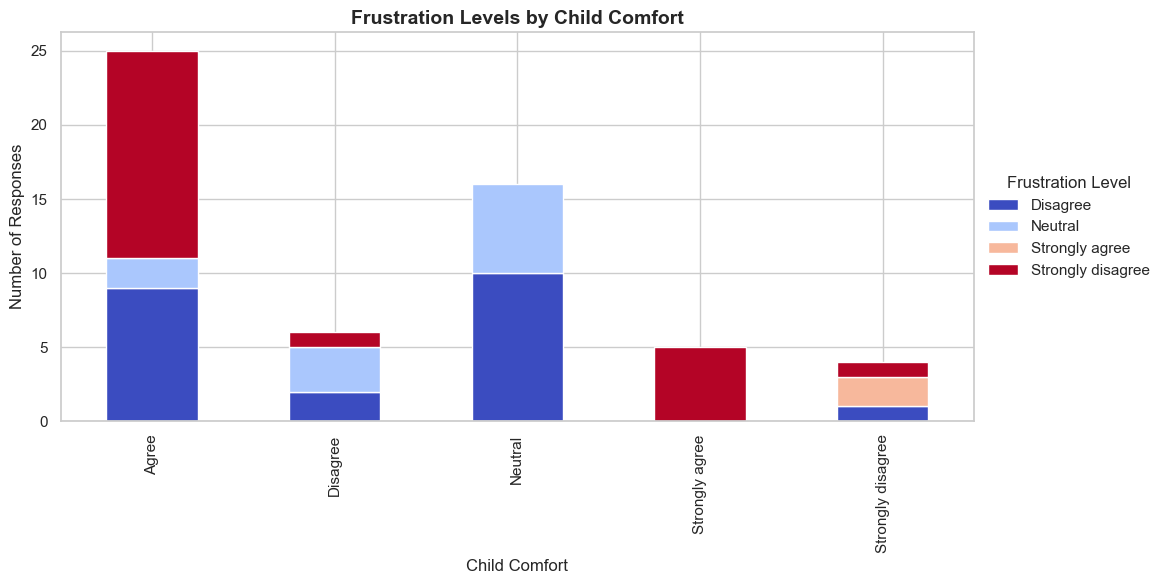

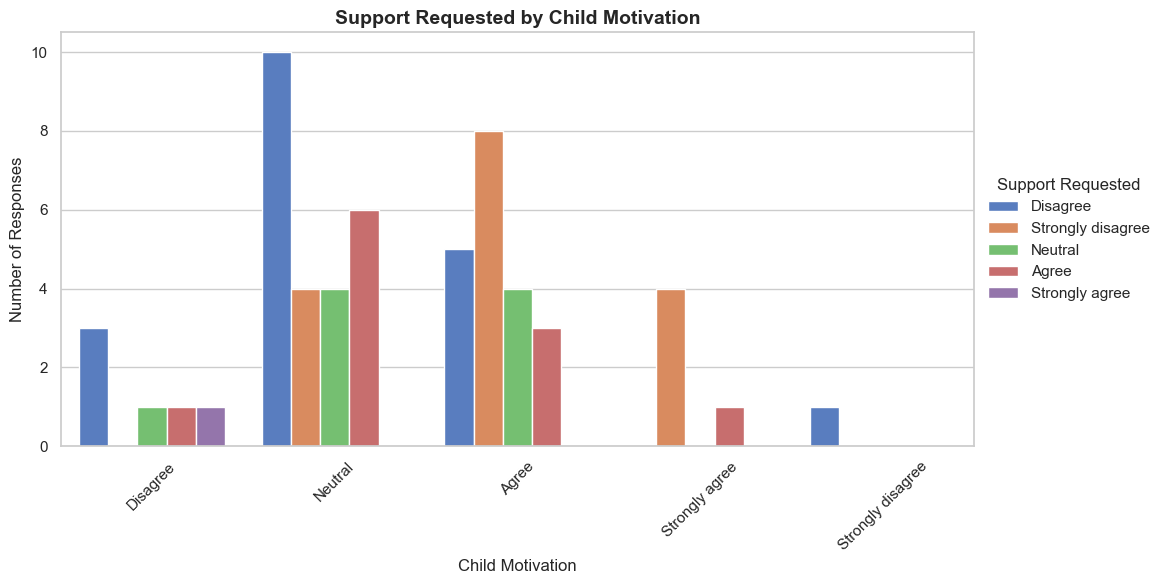

In [14]:
import seaborn as sns

# Consistent plot styling
sns.set(style="whitegrid")

# Mapping of column names to English (if not already renamed)
df.columns = df.columns.str.strip()

# Rename columns for clarity in plots
df = df.rename(columns={
    "Modalità di lettura del bambino": "Reading Mode",
    "Modalità di visualizzazione": "Display Type",
    "Il bambino sembra a suo agio durante la lettura.": "Child Comfort",
    "La piattaforma ha funzionato in maniera efficace": "Platform Effectiveness",
    "Il bambino ha mostrato segni di affaticamento nel svolgere l'attività": "Signs of Fatigue",
    "Il bambino ha mostrato segni di frustrazione nella lettura": "Signs of Frustration",
    "Il bambino è attento durante la lettura": "Child Attention",
    "Il bambino si è mostrato motivato nel svolgere la lettura": "Child Motivation",
    "Il bambino ha richiesto un supporto da parte dell'operatore": "Support Requested",
    "Il bambino è tornato al testo completo durante la risposta alle domande?": "Returned to Full Text"
})

# Helper function to add external legends
def place_legend_outside(ax, title):
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    ax.legend(title=title, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Plot 1: Child Comfort by Reading Mode
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x="Reading Mode", hue="Child Comfort", palette="pastel", ax=ax1)
ax1.set_title("Child Comfort by Reading Mode", fontsize=14, fontweight='bold')
ax1.set_xlabel("Reading Mode")
ax1.set_ylabel("Number of Responses")
ax1.tick_params(axis='x', rotation=45)
place_legend_outside(ax1, "Child Comfort")
plt.tight_layout()
plt.show()

# Plot 2: Platform Effectiveness by Display Type
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x="Display Type", hue="Platform Effectiveness", palette="Set2", ax=ax2)
ax2.set_title("Platform Effectiveness by Display Type", fontsize=14, fontweight='bold')
ax2.set_xlabel("Display Type")
ax2.set_ylabel("Number of Responses")
ax2.tick_params(axis='x', rotation=45)
place_legend_outside(ax2, "Platform Effectiveness")
plt.tight_layout()
plt.show()

# Plot 3: Fatigue by Comfort Level
fatigue_comfort = pd.crosstab(df["Child Comfort"], df["Signs of Fatigue"])
fig3, ax3 = plt.subplots(figsize=(10, 6))
fatigue_comfort.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax3)
ax3.set_title("Fatigue Levels by Child Comfort", fontsize=14, fontweight='bold')
ax3.set_xlabel("Child Comfort")
ax3.set_ylabel("Number of Responses")
place_legend_outside(ax3, "Fatigue Level")
plt.tight_layout()
plt.show()

# Plot 4: Frustration by Comfort Level
frustration_comfort = pd.crosstab(df["Child Comfort"], df["Signs of Frustration"])
fig4, ax4 = plt.subplots(figsize=(10, 6))
frustration_comfort.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax4)
ax4.set_title("Frustration Levels by Child Comfort", fontsize=14, fontweight='bold')
ax4.set_xlabel("Child Comfort")
ax4.set_ylabel("Number of Responses")
place_legend_outside(ax4, "Frustration Level")
plt.tight_layout()
plt.show()

# Plot 5: Support Requested by Motivation
fig5, ax5 = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x="Child Motivation", hue="Support Requested", palette="muted", ax=ax5)
ax5.set_title("Support Requested by Child Motivation", fontsize=14, fontweight='bold')
ax5.set_xlabel("Child Motivation")
ax5.set_ylabel("Number of Responses")
ax5.tick_params(axis='x', rotation=45)
place_legend_outside(ax5, "Support Requested")
plt.tight_layout()
plt.show()
